<a href="https://colab.research.google.com/github/fatisa2000/ml_project/blob/main/Image_Colorization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div align=center>

<p></p>
<p></p>
<font size=5>
In the Name of God
<font/>
<p></p>
 <br/>
    <br/>
<font color=#4d7db8>
Sharif University of Technology - Department of Electrical Engineering
</font>
<p></p>
<font color=#4d7db8>
Introduction To Machine Learning - Dr. Sajjad Amini
</font>
<br/>
<br/>
Spring Semester 1401-02

<div/>

<hr/>
		<div align=center>
		    <font color=red size=6>
			    <br />
        Project - 3rd Phase
        <br />
        Image Colorization using Autoencoder
			</font>
    <br/>
<font size=4>
			<br/><br/>
Due on Tir 10th
                <br/><b>
              Cheating is Strongly Prohibited
                </b><br/><br/>
                <font color=green>
Should you have any questions concerning the project, please feel free to ask via Telegram.
     </font>
</font>
                <br/>
    </div>

# Personal Info
<hr/>
    <div class="column" align=center>
    <font size=4>
        <div class="column">
        <br />
            student_number = Stu. No. 1
            <br />
            Name = ...   
            <br />
            Last_Name = ...
        </div>
        <div class="column">
        <br />
            student_number = Stu. No. 2
            <br />
            Name = ...   
            <br />
            Last_Name = ...
        </div>
    </font>
    </div>


name:fateme   
last name:salehin      
student number:97101961     
i did project alone       


1. Download the "landscape image colorization" dataset and slice it to `train_set`, `validation_set` and `test_set`.
2. Design and train an AutoEncoder using `PyTorch` (not `TensorFlow`) on the dataset to colorize grayscale images
3. plot learning curve and visualize grayscale images of test set, their corresponding color images and their colorized versions side by side.

# Import Necessary Libraries

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision.transforms import transforms
import requests
from sklearn.model_selection import train_test_split
import numpy as np
import json
import csv
from google.colab import files
from torch.utils.data import DataLoader, Dataset
from torchvision.transforms import ToTensor, Resize, Grayscale
from torchvision.transforms.functional import to_grayscale
from torchvision.transforms import functional as F
from torchvision.datasets import ImageFolder
import torchvision
import matplotlib.pyplot as plt

In [ ]:
!pip install kaggle


In [5]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"fatemesalehin","key":"e2ffa232dc9a7eab13f24d57076b67dd"}'}

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dataset = 'theblackmamba31/landscape-image-colorization'

# Load Dataset and Prepare It

In [6]:
! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download theblackmamba31/landscape-image-colorization
! unzip /content/landscape-image-colorization.zip


Streaming output truncated to the last 5000 lines.
  inflating: landscape Images/gray/2914.jpg  
  inflating: landscape Images/gray/2915.jpg  
  inflating: landscape Images/gray/2916.jpg  
  inflating: landscape Images/gray/2917.jpg  
  inflating: landscape Images/gray/2918.jpg  
  inflating: landscape Images/gray/2919.jpg  
  inflating: landscape Images/gray/292.jpg  
  inflating: landscape Images/gray/2920.jpg  
  inflating: landscape Images/gray/2921.jpg  
  inflating: landscape Images/gray/2922.jpg  
  inflating: landscape Images/gray/2923.jpg  
  inflating: landscape Images/gray/2924.jpg  
  inflating: landscape Images/gray/2925.jpg  
  inflating: landscape Images/gray/2926.jpg  
  inflating: landscape Images/gray/2927.jpg  
  inflating: landscape Images/gray/2928.jpg  
  inflating: landscape Images/gray/2929.jpg  
  inflating: landscape Images/gray/293.jpg  
  inflating: landscape Images/gray/2930.jpg  
  inflating: landscape Images/gray/2931.jpg  
  inflating: landscape Images/g

In [7]:
from PIL import Image
import os
dataset_dir='/content/landscape Images/gray'
#image_path = dataset_dir + '/1056.jpg'
#image = Image.open(image_path)
#image.show()
for filename in os.listdir(dataset_dir):
    if filename.endswith('.jpg') or filename.endswith('.jpeg') or filename.endswith('.png'):
        image_path = os.path.join(dataset_dir, filename)
        image = Image.open(image_path)
        #image.show()
image_files = [f for f in os.listdir(dataset_dir) if f.endswith('.jpg')]
dataset_dir1='/content/landscape Images/color'
image_files1 = [f for f in os.listdir(dataset_dir1) if f.endswith('.jpg')]



In [10]:
import os
import random
import shutil

dataset_path = '/content/landscape Images/gray'
train_set_path = '/content/train_set'
validation_set_path = '/content/validation_set'
test_set_path = '/content/test_set'

os.makedirs(train_set_path, exist_ok=True)
os.makedirs(validation_set_path, exist_ok=True)
os.makedirs(test_set_path, exist_ok=True)


image_files = os.listdir(dataset_path)
random.shuffle(image_files)

dataset = ImageFolder('/content/landscape Images', transform=data_transforms)

total_samples = len(image_files)
train_samples = int(total_samples * 0.7)
val_samples = int(total_samples * 0.15)

for image_file in image_files[:train_samples]:
    source_path = os.path.join(dataset_path, image_file)
    destination_path = os.path.join(train_set_path, image_file)
    shutil.copyfile(source_path, destination_path)

for image_file in image_files[train_samples:train_samples+val_samples]:
    source_path = os.path.join(dataset_path, image_file)
    destination_path = os.path.join(validation_set_path, image_file)
    shutil.copyfile(source_path, destination_path)

for image_file in image_files[train_samples+val_samples:]:
    source_path = os.path.join(dataset_path, image_file)
    destination_path = os.path.join(test_set_path, image_file)
    shutil.copyfile(source_path, destination_path)


transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.Grayscale(),
    transforms.ToTensor()
])

image_train = [f for f in os.listdir(train_set_path) if f.endswith('.jpg')]
image_test = [f for f in os.listdir(test_set_path) if f.endswith('.jpg')]
image_valid = [f for f in os.listdir(validation_set_path) if f.endswith('.jpg')]

train_size = int(0.7 * len(dataset))
val_size = int(0.15 * len(dataset))
test_size = len(dataset) - train_size - val_size
train_set, val_set, test_set = torch.utils.data.random_split(dataset, [train_size, val_size, test_size])

batch_size = 32

train_loader = DataLoader(train_set, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_set, batch_size=batch_size)
test_loader = DataLoader(test_set, batch_size=1)



# Define Your Model

In [12]:
class AutoEncoder(nn.Module):
    def __init__(self):
        super(AutoEncoder, self).__init__()

        self.encoder = nn.Sequential(
            nn.Conv2d(3, 16, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )

        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(32, 16, kernel_size=2, stride=2),
            nn.ReLU(),
            nn.ConvTranspose2d(16, 3, kernel_size=2, stride=2),
            nn.Sigmoid()
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

In [9]:
torch.manual_seed(42)

dataset_path = '/content/landscape Images'


data_transforms = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])


dataset = ImageFolder(dataset_path, transform=data_transforms)


val_split = 0.15
test_split = 0.15
dataset_size = len(dataset)
val_size = int(val_split * dataset_size)
test_size = int(test_split * dataset_size)
train_size = dataset_size - val_size - test_size

train_dataset, val_dataset, test_dataset = torch.utils.data.random_split(
    dataset, [train_size, val_size, test_size]
)


batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size)
test_loader = DataLoader(test_dataset, batch_size=batch_size)


# Fit The Model

Also Define optimizer, Criterion and other parameters

In [15]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
autoencoder = AutoEncoder().to(device)
criterion = nn.MSELoss()
optimizer = optim.Adam(autoencoder.parameters(), lr=0.001)

num_epochs = 10
train_losses=[]
val_losses=[]

for epoch in range(num_epochs):
    train_loss = 0.0
    val_loss = 0.0


    autoencoder.train()
    for images, _ in train_loader:
        optimizer.zero_grad()
        images = images.to(device)

        reconstructed = autoencoder(images)
        loss = criterion(reconstructed, images)

        loss.backward()
        optimizer.step()

        train_loss += loss.item() * images.size(0)


    autoencoder.eval()
    with torch.no_grad():
        for images, _ in val_loader:
            images = images.to(device)
            reconstructed = autoencoder(images)
            loss = criterion(reconstructed, images)

            val_loss += loss.item() * images.size(0)

    train_loss /= len(train_dataset)
    val_loss /= len(val_dataset)
    train_losses.append(train_loss)
    val_losses.append(val_loss)

    print(f"Epoch {epoch+1}/{num_epochs} | Train Loss: {train_loss:.4f} | Val Loss: {val_loss:.4f}")


Epoch 1/10 | Train Loss: 0.2471 | Val Loss: 0.1811
Epoch 2/10 | Train Loss: 0.1820 | Val Loss: 0.1762
Epoch 3/10 | Train Loss: 0.1787 | Val Loss: 0.1718
Epoch 4/10 | Train Loss: 0.1753 | Val Loss: 0.1704
Epoch 5/10 | Train Loss: 0.1745 | Val Loss: 0.1698
Epoch 6/10 | Train Loss: 0.1740 | Val Loss: 0.1693
Epoch 7/10 | Train Loss: 0.1736 | Val Loss: 0.1690
Epoch 8/10 | Train Loss: 0.1733 | Val Loss: 0.1687
Epoch 9/10 | Train Loss: 0.1730 | Val Loss: 0.1684
Epoch 10/10 | Train Loss: 0.1728 | Val Loss: 0.1682


# Plot The Results

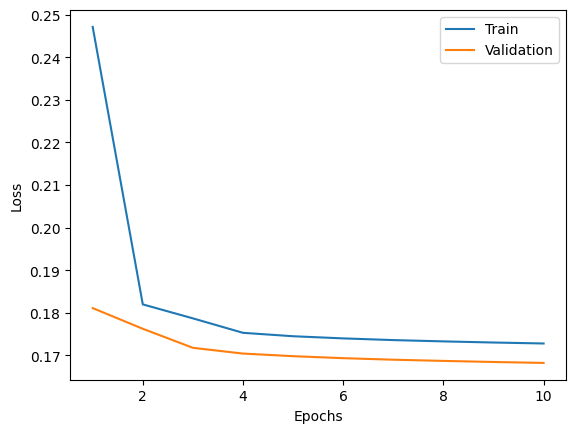

In [16]:
plt.plot(range(1, num_epochs+1), train_losses, label="Train")
plt.plot(range(1, num_epochs+1), val_losses, label="Validation")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

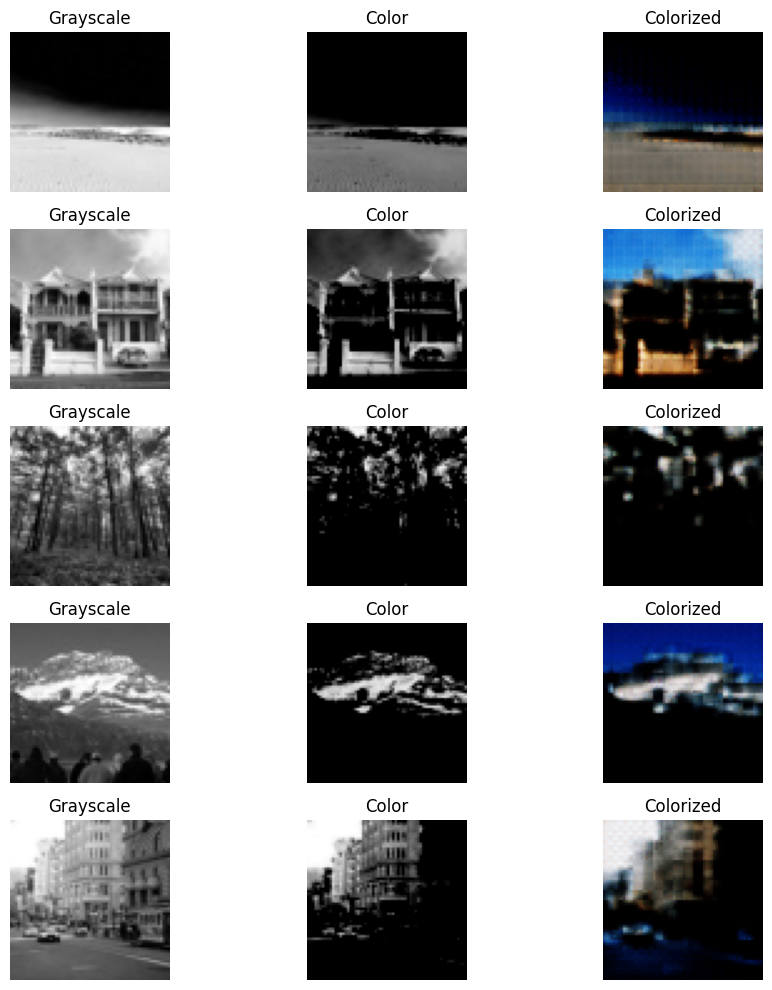

In [22]:
import matplotlib.pyplot as plt

autoencoder.eval()
test_images = []
reconstructed_images = []

with torch.no_grad():
    for images, _ in test_loader:
        images = images.to(device)
        reconstructed = autoencoder(images)
        test_images.append(images.cpu().squeeze(0))
        reconstructed_images.append(reconstructed.cpu())

num_samples = 5  # Number of samples to visualize
fig, axes = plt.subplots(num_samples, 3, figsize=(10, 10))

for i in range(num_samples):
    axes[i, 0].imshow(test_images[i][0], cmap='gray')
    axes[i, 0].axis('off')
    axes[i, 0].set_title('Grayscale')

    axes[i, 1].imshow(test_images[i][0].repeat(3, 1, 1).permute(1, 2, 0))
    axes[i, 1].axis('off')
    axes[i, 1].set_title('Color')

    axes[i, 2].imshow(reconstructed_images[i][0].permute(1, 2, 0))
    axes[i, 2].axis('off')
    axes[i, 2].set_title('Colorized')

plt.tight_layout()
plt.show()

In [23]:
#second model to get different quality
import torchvision.datasets as datasets


class ColorizationNet(nn.Module):
    def __init__(self):
        super(ColorizationNet, self).__init__()

        # Encoder network
        self.encoder = nn.Sequential(
            nn.Conv2d(1, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(64, 128, kernel_size=3, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(128, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(128, 256, kernel_size=3, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(256, 512, kernel_size=3, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1),
            nn.ReLU()
        )

        # Decoder network
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(512, 256, kernel_size=4, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(256, 128, kernel_size=4, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(128, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(128, 64, kernel_size=4, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(64, 32, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(32, 3, kernel_size=3, stride=1, padding=1),
            nn.Tanh()
        )

    def forward(self, grayscale_input):

        encoded = self.encoder(grayscale_input)


        output = self.decoder(encoded)

        return output


device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


batch_size = 64
learning_rate = 0.001
num_epochs = 10

transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor()
])
dataset = datasets.ImageFolder(root='/content/landscape Images' , transform=transform)
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)


model = ColorizationNet().to(device)

criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

total_steps = len(dataloader)
for epoch in range(num_epochs):
    for i, (images, _) in enumerate(dataloader):
        images = images.to(device)

        grayscale_images = torch.mean(images, dim=1, keepdim=True)
        targets = images


        outputs = model(grayscale_images)
        loss = criterion(outputs, targets)


        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i+1) % 10 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{total_steps}], Loss: {loss.item():.4f}')

torch.save(model.state_dict(), 'colorization_model.pth')


Epoch [1/10], Step [10/223], Loss: 0.0734
Epoch [1/10], Step [20/223], Loss: 0.0318
Epoch [1/10], Step [30/223], Loss: 0.0239
Epoch [1/10], Step [40/223], Loss: 0.0215
Epoch [1/10], Step [50/223], Loss: 0.0168
Epoch [1/10], Step [60/223], Loss: 0.0143
Epoch [1/10], Step [70/223], Loss: 0.0141
Epoch [1/10], Step [80/223], Loss: 0.0115
Epoch [1/10], Step [90/223], Loss: 0.0118
Epoch [1/10], Step [100/223], Loss: 0.0109
Epoch [1/10], Step [110/223], Loss: 0.0135
Epoch [1/10], Step [120/223], Loss: 0.0116
Epoch [1/10], Step [130/223], Loss: 0.0076
Epoch [1/10], Step [140/223], Loss: 0.0090
Epoch [1/10], Step [150/223], Loss: 0.0106
Epoch [1/10], Step [160/223], Loss: 0.0078
Epoch [1/10], Step [170/223], Loss: 0.0086
Epoch [1/10], Step [180/223], Loss: 0.0082
Epoch [1/10], Step [190/223], Loss: 0.0089
Epoch [1/10], Step [200/223], Loss: 0.0073
Epoch [1/10], Step [210/223], Loss: 0.0092
Epoch [1/10], Step [220/223], Loss: 0.0081
Epoch [2/10], Step [10/223], Loss: 0.0073
Epoch [2/10], Step [2

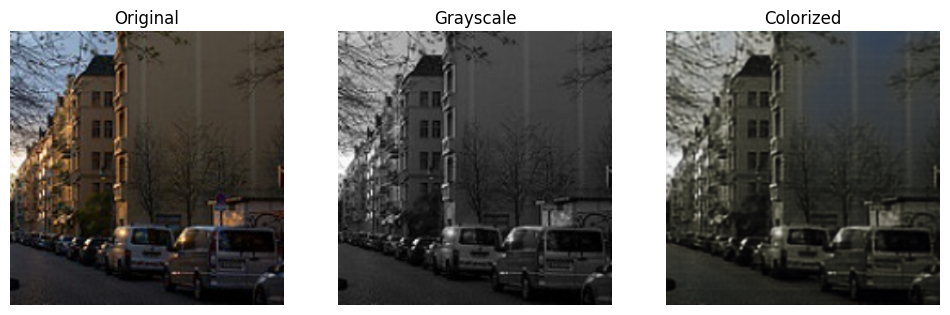

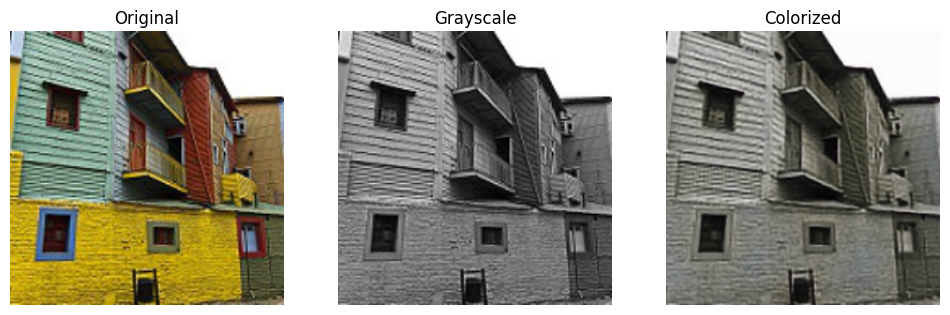

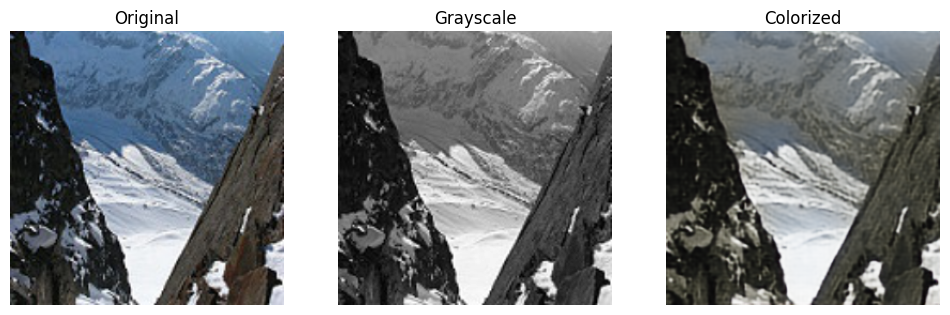

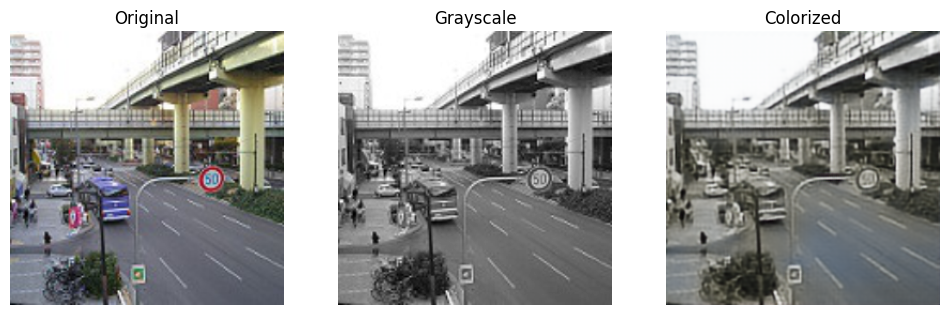

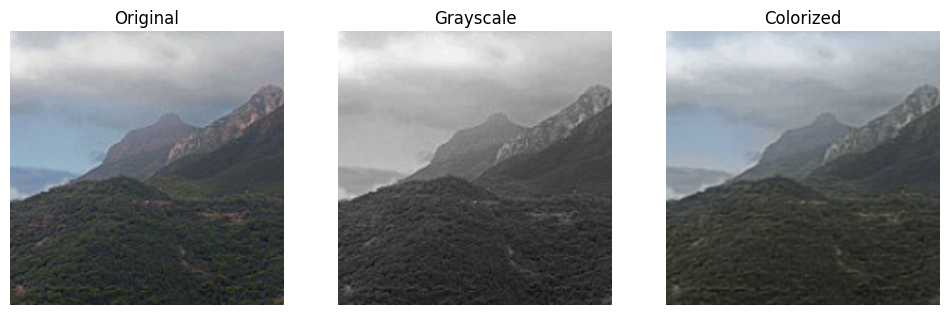

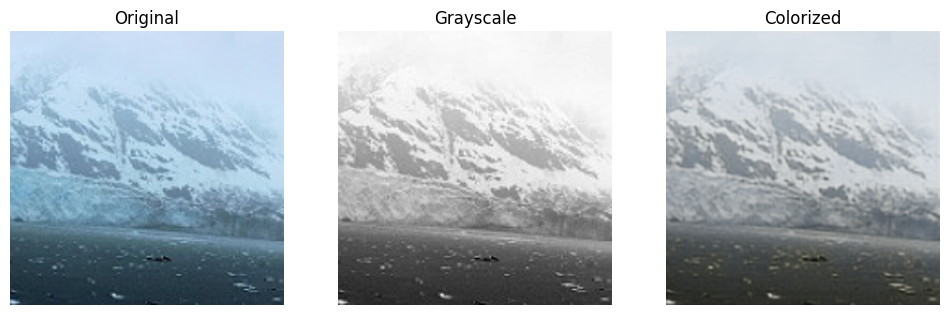

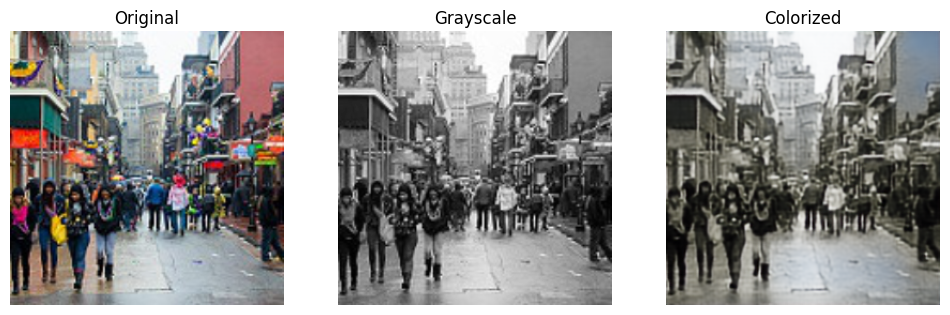

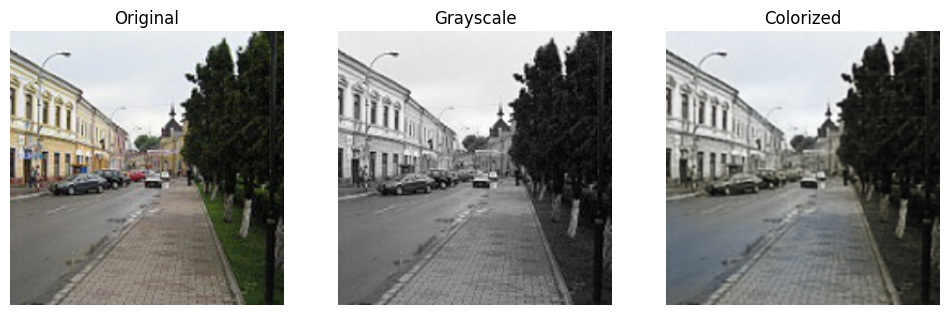

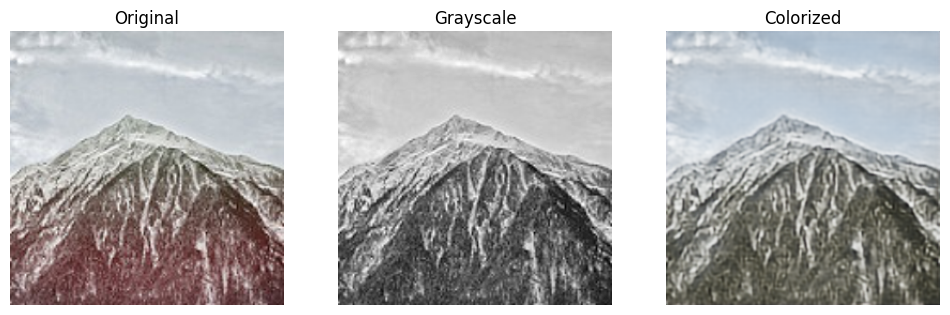

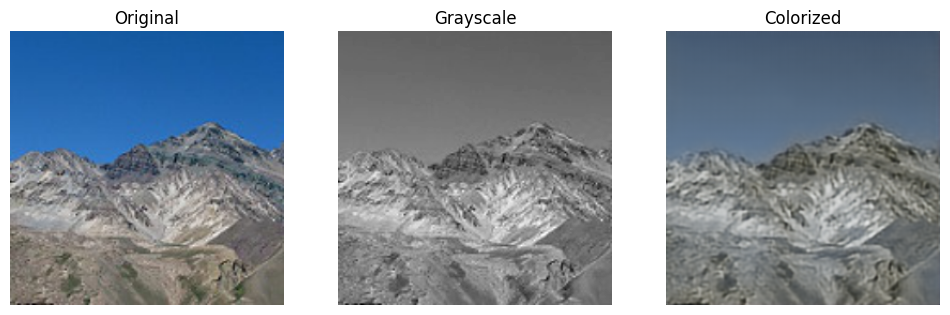

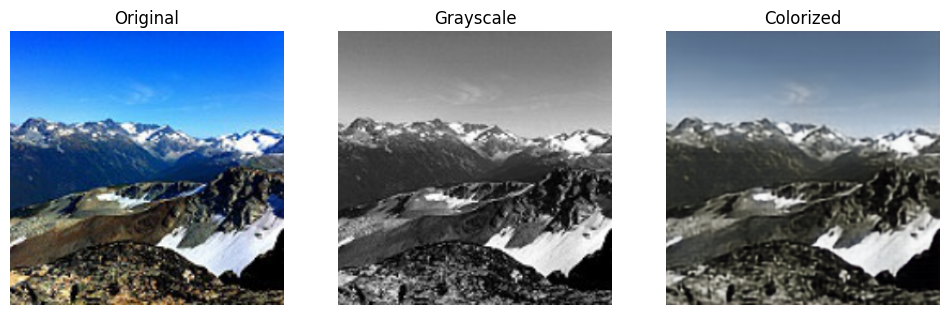

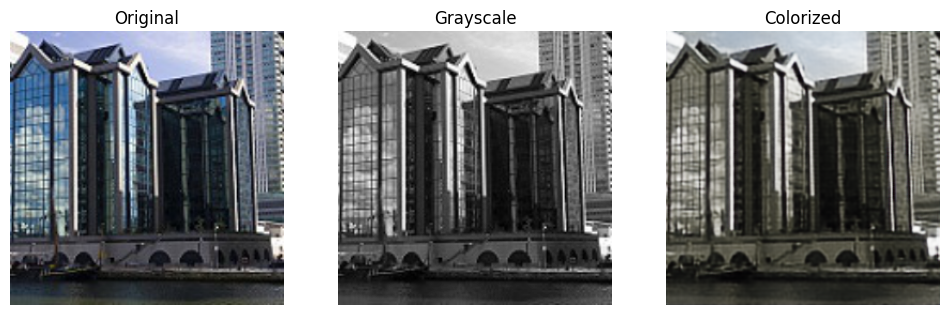

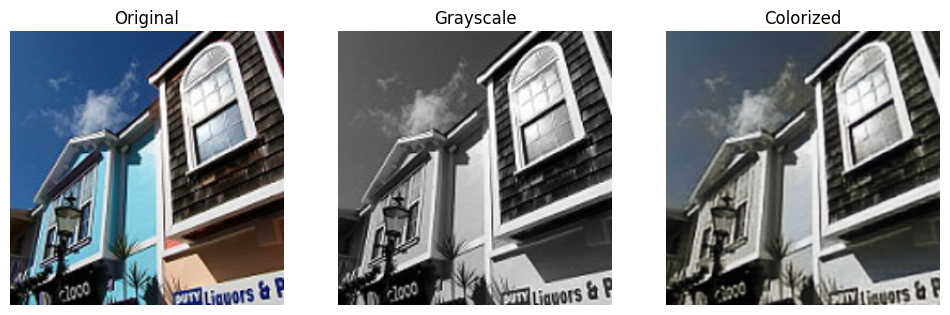

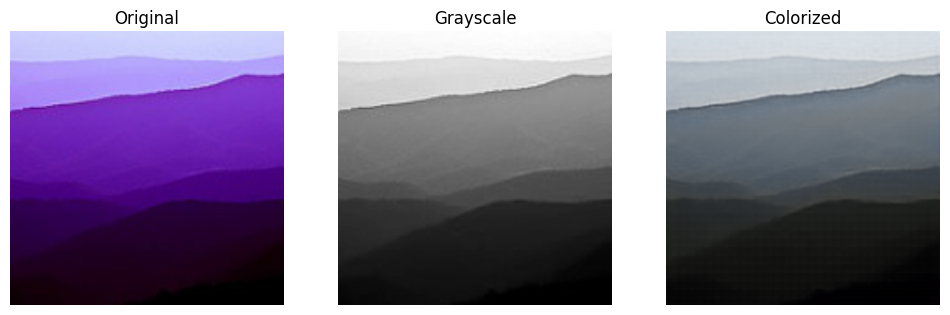

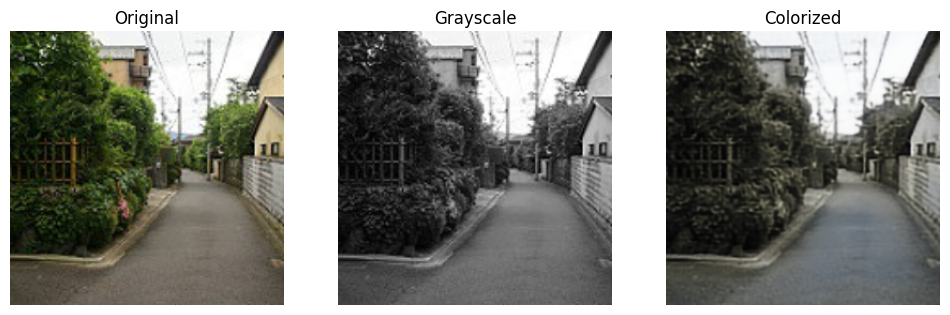

In [ ]:

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

visualize_transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor()
])


test_dataloader = DataLoader(test_dataset, batch_size=1, shuffle=False)


model = ColorizationNet().to(device)


model.load_state_dict(torch.load('colorization_model.pth'))
model.eval()

with torch.no_grad():
    for i, (images, _) in enumerate(test_dataloader):

        images = images.to(device)

        grayscale_images = torch.mean(images, dim=1, keepdim=True)

        colorized_images = model(grayscale_images)

        images = images.cpu().numpy().squeeze(0).transpose((1, 2, 0))
        grayscale_images = grayscale_images.cpu().numpy().squeeze(0).transpose((1, 2, 0))
        colorized_images = colorized_images.cpu().numpy().squeeze(0).transpose((1, 2, 0))

        images = np.clip(images, 0, 1)
        grayscale_images = np.clip(grayscale_images, 0, 1)
        colorized_images = np.clip(colorized_images, 0, 1)

        fig, axs = plt.subplots(1, 3, figsize=(12, 4))
        axs[0].imshow(images)
        axs[0].set_title('Original')
        axs[0].axis('off')
        axs[1].imshow(grayscale_images, cmap='gray')
        axs[1].set_title('Grayscale')
        axs[1].axis('off')
        axs[2].imshow(colorized_images)
        axs[2].set_title('Colorized')
        axs[2].axis('off')

        plt.show()
